<a href="https://colab.research.google.com/github/leesolhahaha/study/blob/main/%5B%ED%96%89%EB%B3%B5%EC%A7%80%EC%88%98_%EB%8D%B0%EC%9D%B4%ED%84%B0%5D_%EA%B4%80%EA%B3%84%EC%84%B1_%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 8.1 상관분석

## 데이터 불러오기

In [ ]:
df2020=pd.read_csv('/content/drive/MyDrive/빅데이터분석시각화/소스코드/8징/2020.csv',index_col=0)
df2021=pd.read_csv('/content/drive/MyDrive/빅데이터분석시각화/소스코드/8징/2021.csv',index_col=0)

In [ ]:
df2020.dtypes

Country name                     object
Happiness score                 float64
upperwhisker                    float64
lowerwhisker                    float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Dystopia                        float64
dtype: object

In [ ]:
df2020.head()

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.8087,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,2.762835
2,Denmark,7.6456,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,2.432741
3,Switzerland,7.5599,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,2.350267
4,Iceland,7.5045,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,2.460688
5,Norway,7.4880,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,2.168266


In [ ]:
df2021.head()

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.842,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,3.253
2,Denmark,7.620,7.687,7.552,10.933,0.954,72.7,0.946,0.030,2.868
3,Switzerland,7.571,7.643,7.500,11.117,0.942,74.4,0.919,0.025,2.839
4,Iceland,7.554,7.670,7.438,10.878,0.983,73.0,0.955,0.160,2.967
5,Netherlands,7.464,7.518,7.410,10.932,0.942,72.4,0.913,0.175,2.798


## 데이터 가공하기

In [ ]:
# 컬럼 삭제하기
df2020.drop(['upperwhisker','lowerwhisker','Dystopia'],axis=1,inplace=True)
df2021.drop(['upperwhisker','lowerwhisker','Dystopia'],axis=1,inplace=True)

In [ ]:
df2020.head()
df2021.head()

,Country name,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Rank,,,,,,,
1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098
2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030
3,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025
4,Iceland,7.554,10.878,0.983,73.0,0.955,0.160
5,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175


In [ ]:
# 컬럼이름 변경하기 : 모든 컬럼들의 빈공백을 점(.)으로 대체한다.
#df2020.columns=df2020.columns.str.replace(' ','.')
#df2021.columns=df2021.columns.str.replace(' ','.')
df2020.columns=['Country','Score','GDP.per.capita','Social.support','Life.expectancy','Freedom','Generosity']
df2021.columns=['Country','Score','GDP.per.capita','Social.support','Life.expectancy','Freedom','Generosity']

In [ ]:
df2020.columns
df2021.columns

Index(['Country', 'Score', 'GDP.per.capita', 'Social.support',
       'Life.expectancy', 'Freedom', 'Generosity'],
      dtype='object')

## 데이터 시각화

In [ ]:
# 행복 지수에 영향을 주는 요인 파악

In [ ]:
# 행복 점수와 기능의 상관 관계
# Correlating features with the happiness scores

In [ ]:
# 한 국가의 행복지수와 경제적(GDP), 법적 상태(Freedom) 간에 강한 관계가 있습니까?
# corr_perception
# GDP_per_capita
# Freedom
df1=df2020.copy()
df1.drop(['Social.support','Life.expectancy','Generosity'],axis=1,inplace=True)
df1

,Country,Score,GDP.per.capita,Freedom
Rank,,,,
1,Finland,7.8087,10.639267,0.949172
2,Denmark,7.6456,10.774001,0.951444
3,Switzerland,7.5599,10.979933,0.921337
4,Iceland,7.5045,10.772559,0.948892
5,Norway,7.4880,11.087804,0.955750
...,...,...,...,...
149,Central African Republic,3.4759,6.625160,0.640881
150,Rwanda,3.3123,7.600104,0.900589
151,Zimbabwe,3.2992,7.865712,0.711458


In [ ]:
# 상관계수 구하기
corr=df1.corr()
corr
corr['Score'].sort_values(ascending=False)

Score             1.000000
GDP.per.capita    0.775374
Freedom           0.590597
Name: Score, dtype: float64

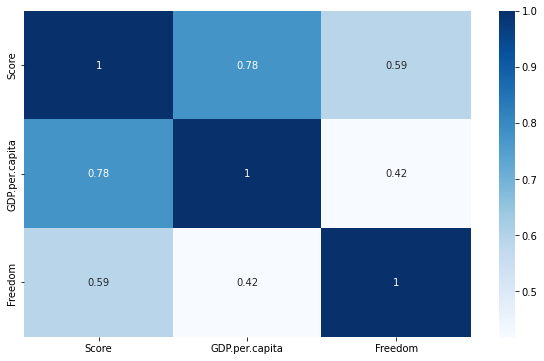

In [ ]:
# 히트맵 그리기
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='Blues')

In [ ]:
df2=df2021.copy()
df2.drop(['Social.support','Life.expectancy','Generosity'],axis=1,inplace=True)
df2

,Country,Score,GDP.per.capita,Freedom
Rank,,,,
1,Finland,7.842,10.775,0.949
2,Denmark,7.620,10.933,0.946
3,Switzerland,7.571,11.117,0.919
4,Iceland,7.554,10.878,0.955
5,Netherlands,7.464,10.932,0.913
...,...,...,...,...
145,Lesotho,3.512,7.926,0.715
146,Botswana,3.467,9.782,0.824
147,Rwanda,3.415,7.676,0.897


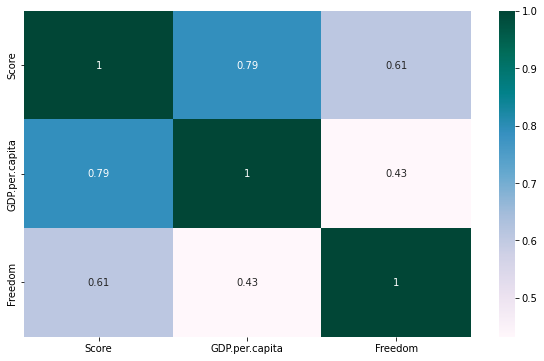

In [ ]:
# 히트맵 그리기
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True,cmap='PuBuGn')

In [ ]:
''' 분석결과
위에 표시된 2개의 히트맵은 2020년, 2021년 각각에 해당하는 3개 열, 점수, GDP, 자유 상관관 관계 매트릭스를 표시한다.
이제 3가지 요소가 점수에 미치는 영향에 대해 설명합니다.
'''
'''
1. GDP는 행복지수와 어떤 관련이 있습니까?
히트맵에서 GDP.per.capita와 Score 간의 상관 계수는 총 2년 동안 ~ 0.79로
GDP에 대한 시민의 만족도와 행복도 점수 사이에 강한 양의 관계가 있음을 나타냅니다.
GDP.per.capita는 한 국가의 경제 성장을 추적하는 지표입니다.
긍정적인 경제 성장률을 보이는 국가의 사람들은 더 높은 소득과 더 나은 생활 수준으로 이어지기 때문에 더 행복해지는 경향이 있습니다.
따라서 우리는 만족을 보장하기 위해 한 국가의 GDP가 최우선 순위 중 하나가 되어야 한다고 결론지었습니다.

2. 행복 점수와 자유의 관계?
자유와 점수 사이의 상관 계수는 2년 전체에서 ~ 0.61로 자유에 대한 인식과
국가의 행복 지수 사이에 중간 정도의 양의 관계를 나타냅니다. 자유에 대한 이러한 인식을 일반화하는 것은 연구에 따르면 세계의 다른 지역에 속한 사람들마다 다르기 때문에 어려운 작업입니다. 그럼에도 불구하고 여전히 국가의 행복지수에 중요한 기여를 합니다.
'''


'\n1. GDP는 행복지수와 어떤 관련이 있습니까?\n히트맵에서 GDP.per.capita와 Score 간의 상관 계수는 총 2년 동안 ~ 0.79로 \nGDP에 대한 시민의 만족도와 행복도 점수 사이에 강한 양의 관계가 있음을 나타냅니다. \nGDP.per.capita는 한 국가의 경제 성장을 추적하는 지표입니다. \n긍정적인 경제 성장률을 보이는 국가의 사람들은 더 높은 소득과 더 나은 생활 수준으로 이어지기 때문에 더 행복해지는 경향이 있습니다.\n따라서 우리는 만족을 보장하기 위해 한 국가의 GDP가 최우선 순위 중 하나가 되어야 한다고 결론지었습니다.\n\n2. 행복 점수와 자유의 관계?\n자유와 점수 사이의 상관 계수는 2년 전체에서 ~ 0.61로 자유에 대한 인식과 \n국가의 행복 지수 사이에 중간 정도의 양의 관계를 나타냅니다. 자유에 대한 이러한 인식을 일반화하는 것은 연구에 따르면 세계의 다른 지역에 속한 사람들마다 다르기 때문에 어려운 작업입니다. 그럼에도 불구하고 여전히 국가의 행복지수에 중요한 기여를 합니다.\n'

In [ ]:
x1=df2020[['Generosity','Social.support','Score']].copy()
x2=df2021[['Generosity','Social.support','Score']].copy()

In [ ]:
x1
x2

,Generosity,Social.support,Score
Rank,,,
1,-0.098,0.954,7.842
2,0.030,0.954,7.620
3,0.025,0.942,7.571
4,0.160,0.983,7.554
5,0.175,0.942,7.464
...,...,...,...
145,-0.131,0.787,3.512
146,-0.246,0.784,3.467
147,0.061,0.552,3.415


In [ ]:
'''
한 국가의 사회적 상태에 대한 인식은 행복 지수에 어떤 영향을 미칩니까?
이 질문에 답하기 위해 각 데이터 세트에서 3개 열의 상관 히트맵을 플로팅합니다.
관대
가족
점수
'''

'\n한 국가의 사회적 상태에 대한 인식은 행복 지수에 어떤 영향을 미칩니까?\n이 질문에 답하기 위해 각 데이터 세트에서 3개 열의 상관 히트맵을 플로팅합니다.\n관대\n가족\n점수\n'

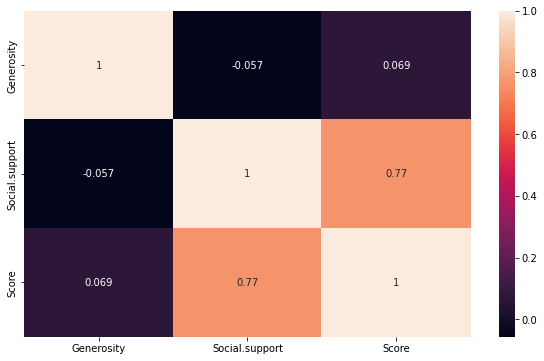

In [ ]:
#for year 2020
a1=x1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(a1,annot=True)

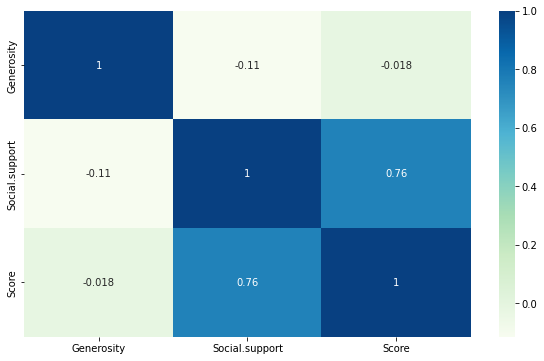

In [ ]:
#for year 2021
a2=x2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(a2,annot=True,cmap='GnBu')

In [ ]:
'''
설명 : 관대함과 사회적 지지는 행복 점수와 어떤 관련이 있습니까?
관대함과 사회적 지지 상관 계수는 -0.057, -0.11으로 관찰되어 매우 약한 음의 관계를 나타냅니다.
두 메트릭 간에 선형 변화가 많이 관찰되지 않습니다.
관대함은 시민들이 서로에게서 얻는 인식입니다.

관대함과 점수 상관계수는 0.069, -0.018으로 관찰되어 매우 약한 음의 관계를 나타낸다.

한편, 사회적 지지와 점수의 상관값은 0.77, 0.76로 강한 양의 관계를 나타낸다.
사회적 지지는 사람들이 가족, 친구, 지인 등과 함께 얼마나 행복한지에 대한 인식입니다.
이들은 일상생활에서 거의 모든 사람들이 대하는 사람들이기 때문에
사회적 지지에 대한 인식이 행복지수를 결정하는 중요한 요소라고 볼 수 있다.
'''

'\n설명 : 관대함과 사회적 지지는 행복 점수와 어떤 관련이 있습니까?\n관대함과 사회적 지지 상관 계수는 -0.057, -0.11으로 관찰되어 매우 약한 음의 관계를 나타냅니다. \n두 메트릭 간에 선형 변화가 많이 관찰되지 않습니다. \n관대함은 시민들이 서로에게서 얻는 인식입니다. \n\n관대함과 점수 상관계수는 0.069, -0.018으로 관찰되어 매우 약한 음의 관계를 나타낸다.\n\n한편, 사회적 지지와 점수의 상관값은 0.77, 0.76로 강한 양의 관계를 나타낸다. \n사회적 지지는 사람들이 가족, 친구, 지인 등과 함께 얼마나 행복한지에 대한 인식입니다.\n이들은 일상생활에서 거의 모든 사람들이 대하는 사람들이기 때문에 \n사회적 지지에 대한 인식이 행복지수를 결정하는 중요한 요소라고 볼 수 있다.\n'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


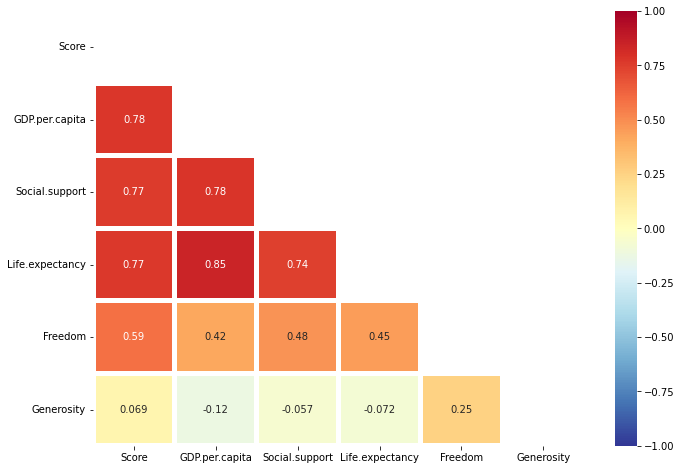

In [ ]:
# 전체 상관계수
import numpy as np
corr = df2020.corr()
corr['Score']
plt.figure(figsize=(11,8))
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask = mask,vmin=-1, vmax=1,annot = True,
            cmap ='RdYlBu_r', linewidths=4 )

In [ ]:
df2020.shape

(153, 7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


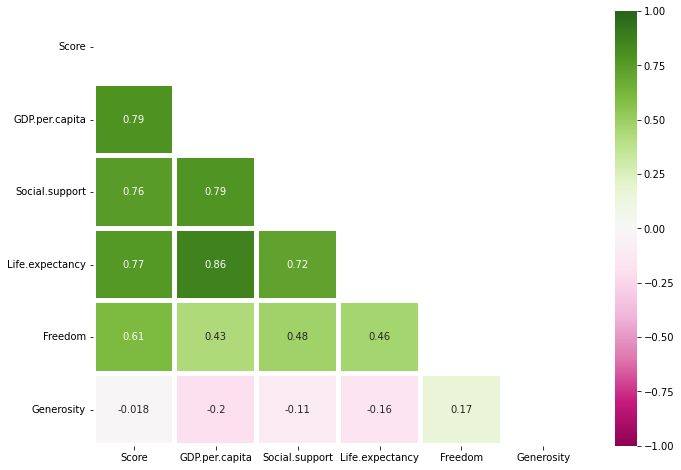

In [ ]:
# 전체 상관계수
import numpy as np
corr = df2021.corr()
corr['Score']
plt.figure(figsize=(11,8))
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask = mask,vmin=-1, vmax=1,annot = True,
            cmap ='PiYG', linewidths=4 )

In [ ]:
df2021

,Country,Score,GDP.per.capita,Social.support,Life.expectancy,Freedom,Generosity
Rank,,,,,,,
1,Finland,7.842,10.775,0.954,72.000,0.949,-0.098
2,Denmark,7.620,10.933,0.954,72.700,0.946,0.030
3,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025
4,Iceland,7.554,10.878,0.983,73.000,0.955,0.160
5,Netherlands,7.464,10.932,0.942,72.400,0.913,0.175
...,...,...,...,...,...,...,...
145,Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131
146,Botswana,3.467,9.782,0.784,59.269,0.824,-0.246
147,Rwanda,3.415,7.676,0.552,61.400,0.897,0.061


In [ ]:
top50=df2021.head(50)
top50

,Country,Score,GDP.per.capita,Social.support,Life.expectancy,Freedom,Generosity
Rank,,,,,,,
1,Finland,7.842,10.775,0.954,72.000,0.949,-0.098
2,Denmark,7.620,10.933,0.954,72.700,0.946,0.030
3,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025
4,Iceland,7.554,10.878,0.983,73.000,0.955,0.160
5,Netherlands,7.464,10.932,0.942,72.400,0.913,0.175
6,Norway,7.392,11.053,0.954,73.300,0.960,0.093
7,Sweden,7.363,10.867,0.934,72.700,0.945,0.086
8,Luxembourg,7.324,11.647,0.908,72.600,0.907,-0.034
9,New Zealand,7.277,10.643,0.948,73.400,0.929,0.134


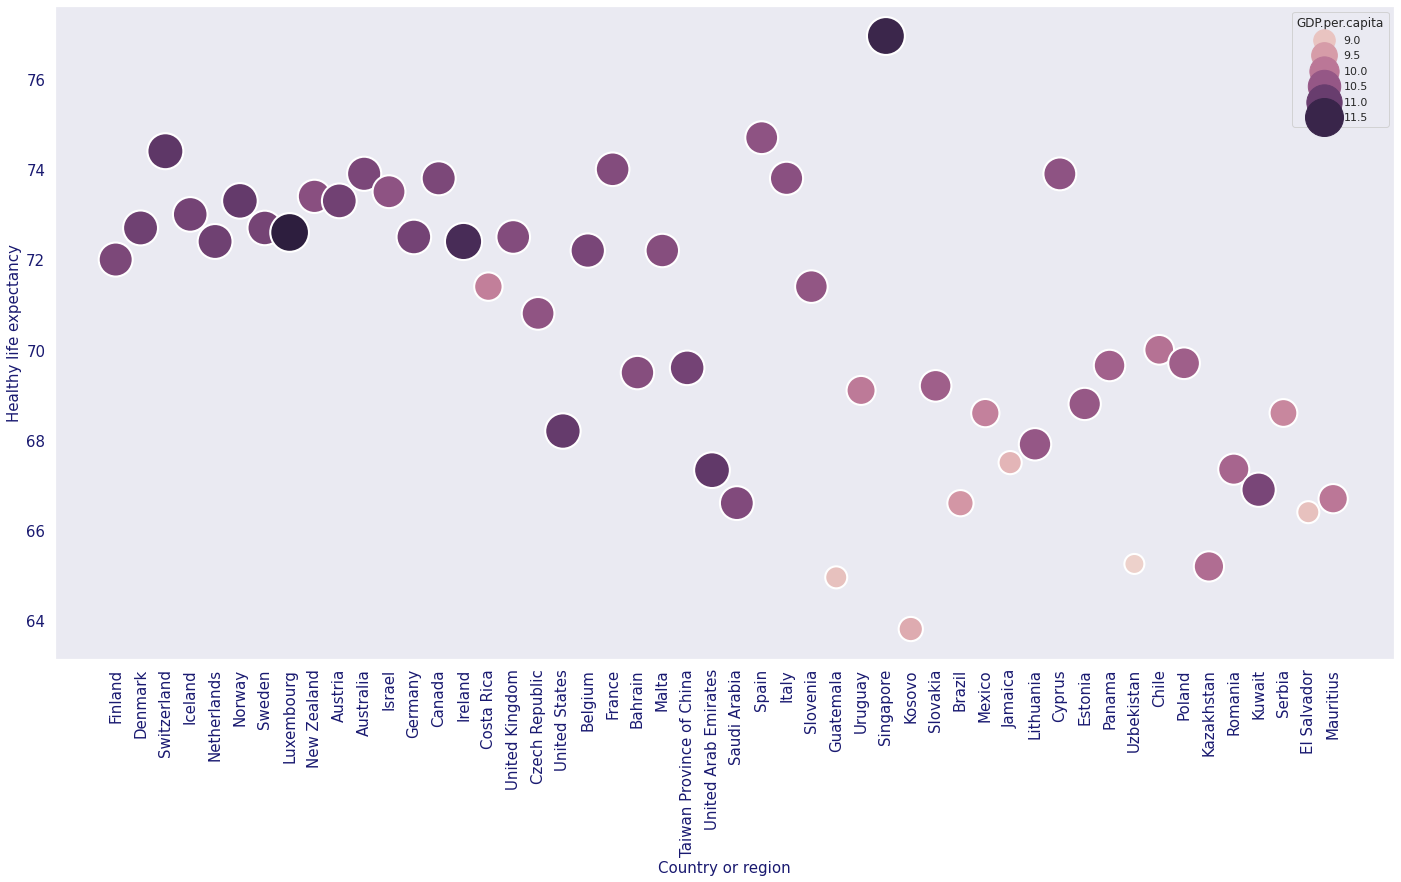

In [ ]:
import seaborn as sns
sns.set_theme(style='dark')
plt.figure(figsize=(24,12))
ax=sns.scatterplot(data=top50,x='Country',y='Life.expectancy',size='GDP.per.capita',sizes=(400,1500)
                   ,hue='GDP.per.capita')
plt.xticks(rotation=90,fontsize=15,color='midnightblue')
plt.yticks(fontsize=15,color='midnightblue')
plt.xlabel('Country or region',size=15,color='midnightblue')
plt.ylabel('Healthy life expectancy',size=15,color='midnightblue')
plt.show()

In [ ]:
# 행복도에 가장 큰 영향을 주는 것은 경제적 여유, 사회적 지지, 기대수명(건간), 자유도 순인 것을 알 수 있었다.

In [ ]:
economy = df2020.loc[:,['Country','GDP.per.capita']]
economy = economy.groupby(economy.Country)['GDP.per.capita'].mean().sort_values(ascending=False)
economy = economy.rank(method='min',ascending=False)['South Korea']

social = df2020.loc[:,['Country','Social.support']]
social = social.groupby(social.Country)['Social.support'].mean().sort_values(ascending=False)
social = social.rank(method='min',ascending=False)['South Korea']

health = df2020.loc[:,['Country','Life.expectancy']]
health = health.groupby(health.Country)['Life.expectancy'].mean().sort_values(ascending=False)
health = health.rank(method='min',ascending=False)['South Korea']

free = df2020.loc[:,['Country','Freedom']]
free= free.groupby(free.Country)['Freedom'].mean().sort_values(ascending=False)
free = free.rank(method='min',ascending=False)['South Korea']

print(f'153개국 중 대한민국의 \nGDP 순위:{economy.astype(np.int)}위\n사회적 지위 순위:{social.astype(np.int)}위\n기대수명 순위:{health.astype(np.int)}위\n자유도 순위:{free.astype(np.int)}위')

153개국 중 대한민국의 
GDP 순위:27위
사회적 지위 순위:99위
기대수명 순위:10위
자유도 순위:140위


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
'''
GDP 순위는 양호, 기대수명은 굉장히 높다. 다른나라보다 국가 복지 수준이 높은 덕에 높은 순위를 차지한 것 같다.
사회적 지위 순위도 하위 수준이었다.
자유도는 거의 최하위 수준이였다.
자유도의 정의는 무엇일까. 정치적으로 문제가 있으면 자유롭게 시위도하고, 표현의 자유, 언론의 자유, 알권리 모두 상위라고 생각하는데 이렇게 최 하위 수준이 나온 이유는 무엇일까.
행복도가 높은 유럽지역처럼 길거리에서 느껴지는 여유로움이 자유도의 큰 부분을 차지하는 것일까?
'''

'\nGDP 순위는 양호, 기대수명은 굉장히 높다. 다른나라보다 국가 복지 수준이 높은 덕에 높은 순위를 차지한 것 같다.\n사회적 지위 순위도 하위 수준이었다.\n자유도는 거의 최하위 수준이였다. \n자유도의 정의는 무엇일까. 정치적으로 문제가 있으면 자유롭게 시위도하고, 표현의 자유, 언론의 자유, 알권리 모두 상위라고 생각하는데 이렇게 최 하위 수준이 나온 이유는 무엇일까.\n행복도가 높은 유럽지역처럼 길거리에서 느껴지는 여유로움이 자유도의 큰 부분을 차지하는 것일까?\n'

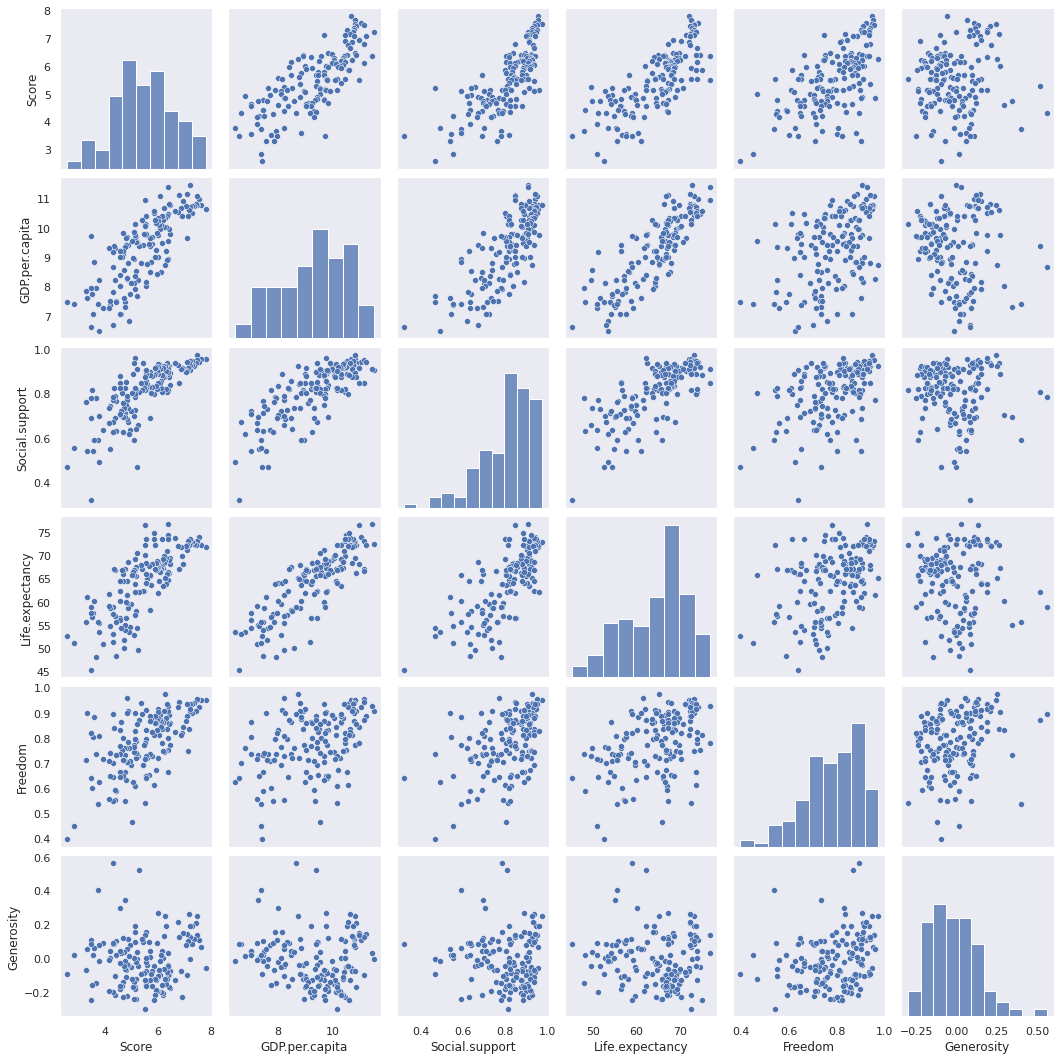

In [ ]:
# 위에서 관찰된 상관관계를 확인하기 위한 산점도 그리기
#plt.figure(figsize=(8,5))
sns.pairplot(df2020)

# 8.2 연관분석

## 연관분석 이해

In [ ]:
dataset=[['사과','치즈','생수'],
['생수','호두','치즈','고등어'],
['수박','사과','생수'],
['생수','호두','치즈','옥수수']]

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
# mlxtend :  일상적인 데이터 사이언스 작업에 유용한 도구들로 구성된 파이썬 라이브러리

In [ ]:
dataset = [['Milk', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
['Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
['Milk', 'Orange', 'Corn', 'Beans', 'Yogurt'],
['Corn', 'Cookie', 'Cookie', 'Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Beans,Coke,Cookie,Corn,Eggs,Ice cream,Kidney Beans,Milk,Orange,Yogurt
0,True,True,False,True,False,True,False,False,True,False,True
1,True,True,True,True,False,True,False,False,False,False,True
2,True,False,False,False,False,True,False,True,True,False,False
3,False,True,False,False,True,False,False,False,True,True,True
4,False,True,False,True,True,True,True,False,False,False,False


In [ ]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

# 지지도를 기준으로 내림차순
frequent_itemsets
frequent_itemsets.sort_values('support',ascending=False)

,support,itemsets
1,0.8,(Beans)
3,0.8,(Eggs)
0,0.6,(Apple)
2,0.6,(Cookie)
4,0.6,(Milk)
5,0.6,(Yogurt)
6,0.6,"(Eggs, Apple)"
7,0.6,"(Beans, Cookie)"
8,0.6,"(Beans, Eggs)"
9,0.6,"(Beans, Yogurt)"


In [ ]:
rules1=association_rules(frequent_itemsets, metric='lift', min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Apple),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
1,(Apple),(Eggs),0.6,0.8,0.6,1.00,1.250000,0.12,inf
2,(Beans),(Cookie),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
3,(Cookie),(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf
4,(Beans),(Eggs),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
5,(Eggs),(Beans),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
6,(Beans),(Yogurt),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
7,(Yogurt),(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf
8,(Eggs),(Cookie),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
9,(Cookie),(Eggs),0.6,0.8,0.6,1.00,1.250000,0.12,inf


In [ ]:
# 향상도가 1.2이상인 패턴을 발견
rules2 = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1.2)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Apple),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
1,(Apple),(Eggs),0.6,0.8,0.6,1.00,1.250000,0.12,inf
2,(Beans),(Cookie),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
3,(Cookie),(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf
4,(Beans),(Yogurt),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
5,(Yogurt),(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf
6,(Eggs),(Cookie),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
7,(Cookie),(Eggs),0.6,0.8,0.6,1.00,1.250000,0.12,inf
8,"(Beans, Eggs)",(Cookie),0.6,0.6,0.6,1.00,1.666667,0.24,inf
9,"(Beans, Cookie)",(Eggs),0.6,0.8,0.6,1.00,1.250000,0.12,inf


In [ ]:
#itemsets의 제품 개수에 따른 필터링을 위해 length열을 추가
#결과를 frequent_itemsets라는 이름으로 생성
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Apple),1
1,0.8,(Beans),1
2,0.6,(Cookie),1
3,0.8,(Eggs),1
4,0.6,(Milk),1
5,0.6,(Yogurt),1
6,0.6,"(Eggs, Apple)",2
7,0.6,"(Beans, Cookie)",2
8,0.6,"(Beans, Eggs)",2
9,0.6,"(Beans, Yogurt)",2


In [ ]:
# frequent_itemsets에서 특정 조건을 만족시키는 행들을 선택
frequent_itemsets1 = frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.6)]
frequent_itemsets1

,support,itemsets,length
6,0.6,"(Eggs, Apple)",2
7,0.6,"(Beans, Cookie)",2
8,0.6,"(Beans, Eggs)",2
9,0.6,"(Beans, Yogurt)",2
10,0.6,"(Eggs, Cookie)",2
